Price prediction of BMW

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import libraies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [4]:
bmw = pd.read_csv("/content/drive/MyDrive/bmw_pricing_challenge.csv")

In [5]:
bmw.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01


In [6]:
bmw.tail()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
4838,BMW,218 Gran Tourer,39743,110,2015-10-01,diesel,black,van,False,True,False,False,False,False,True,False,14600,2018-08-01
4839,BMW,218 Active Tourer,49832,100,2015-06-01,diesel,grey,van,False,True,False,False,False,False,True,True,17500,2018-08-01
4840,BMW,218 Gran Tourer,19633,110,2015-10-01,diesel,grey,van,False,True,False,False,False,False,True,True,17000,2018-09-01
4841,BMW,218 Active Tourer,27920,110,2016-04-01,diesel,brown,van,True,True,False,False,False,False,True,True,22700,2018-09-01
4842,BMW,525,195840,160,2013-01-01,diesel,grey,van,True,True,False,False,True,False,True,True,15500,2018-09-01


In [7]:
bmw.describe()

,mileage,engine_power,price
count,4.843000e+03,4843.00000,4843.000000
mean,1.409628e+05,128.98823,15828.081767
std,6.019674e+04,38.99336,9220.285684
min,-6.400000e+01,0.00000,100.000000
25%,1.029135e+05,100.00000,10800.000000
50%,1.410800e+05,120.00000,14200.000000
75%,1.751955e+05,135.00000,18600.000000
max,1.000376e+06,423.00000,178500.000000


In [8]:
bmw.shape

(4843, 18)

In [9]:
bmw[bmw.duplicated()]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at


In [10]:
len(bmw[bmw.duplicated()])

0

In [11]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   maker_key          4843 non-null   object
 1   model_key          4843 non-null   object
 2   mileage            4843 non-null   int64 
 3   engine_power       4843 non-null   int64 
 4   registration_date  4843 non-null   object
 5   fuel               4843 non-null   object
 6   paint_color        4843 non-null   object
 7   car_type           4843 non-null   object
 8   feature_1          4843 non-null   bool  
 9   feature_2          4843 non-null   bool  
 10  feature_3          4843 non-null   bool  
 11  feature_4          4843 non-null   bool  
 12  feature_5          4843 non-null   bool  
 13  feature_6          4843 non-null   bool  
 14  feature_7          4843 non-null   bool  
 15  feature_8          4843 non-null   bool  
 16  price              4843 non-null   int64 


In [12]:
bmw.isnull().sum()

maker_key            0
model_key            0
mileage              0
engine_power         0
registration_date    0
fuel                 0
paint_color          0
car_type             0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
price                0
sold_at              0
dtype: int64

<Axes: >

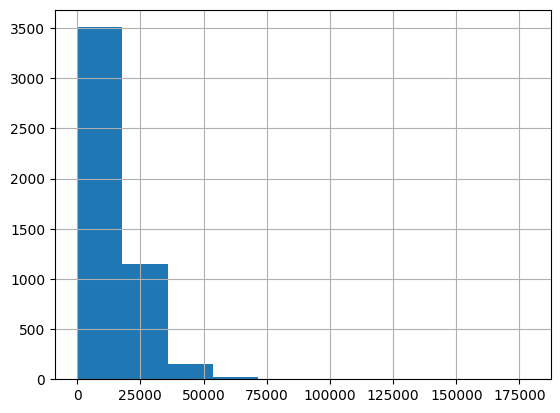

In [13]:
  bmw['price'].hist()

<Axes: >

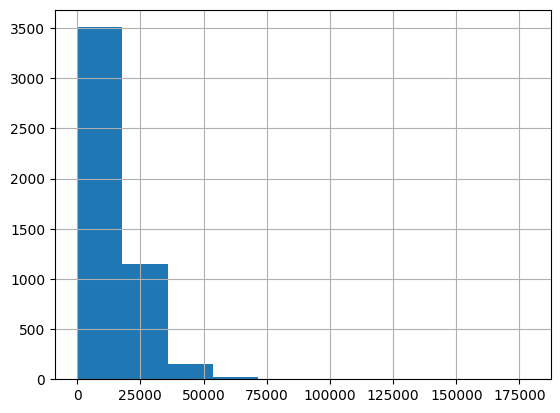

In [14]:
# Change the column name to 'prices'
bmw.rename(columns={'price': 'prices'}, inplace=True)

# Access the 'prices' column and create a histogram
bmw['prices'].hist()

Detallo las filas de 'price' que contienen nulos, para comprobar qué aportan en el resto de datos.

In [15]:
bmw[bmw['prices'].isnull()]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,prices,sold_at


In [16]:
bmw2 = bmw.dropna(subset=['prices'])

In [17]:
bmw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   maker_key          4843 non-null   object
 1   model_key          4843 non-null   object
 2   mileage            4843 non-null   int64 
 3   engine_power       4843 non-null   int64 
 4   registration_date  4843 non-null   object
 5   fuel               4843 non-null   object
 6   paint_color        4843 non-null   object
 7   car_type           4843 non-null   object
 8   feature_1          4843 non-null   bool  
 9   feature_2          4843 non-null   bool  
 10  feature_3          4843 non-null   bool  
 11  feature_4          4843 non-null   bool  
 12  feature_5          4843 non-null   bool  
 13  feature_6          4843 non-null   bool  
 14  feature_7          4843 non-null   bool  
 15  feature_8          4843 non-null   bool  
 16  prices             4843 non-null   int64 


In [18]:
bmw2['maker_key'].value_counts()

maker_key
BMW    4843
Name: count, dtype: int64

In [19]:
len(bmw[bmw['maker_key'].isnull()])

0

In [20]:
del(bmw2['maker_key'])

In [21]:
bmw2.isnull().sum()

model_key            0
mileage              0
engine_power         0
registration_date    0
fuel                 0
paint_color          0
car_type             0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
prices               0
sold_at              0
dtype: int64

In [22]:
bmw2['car_type'].value_counts()

car_type
estate         1606
sedan          1168
suv            1058
hatchback       699
subcompact      117
coupe           104
convertible      47
van              44
Name: count, dtype: int64

In [23]:
bmw2[bmw2['car_type'].isnull()]

,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,prices,sold_at


In [24]:
 bmw3 = bmw2.copy()

In [25]:
bmw3['car_type'].fillna('unknown', inplace=True)

Compruebo que la columna car_typeo ya no tiene nulos, y prosigo con la lista de columnas.

In [26]:
bmw3.isnull().sum()

model_key            0
mileage              0
engine_power         0
registration_date    0
fuel                 0
paint_color          0
car_type             0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
prices               0
sold_at              0
dtype: int64

<Axes: >

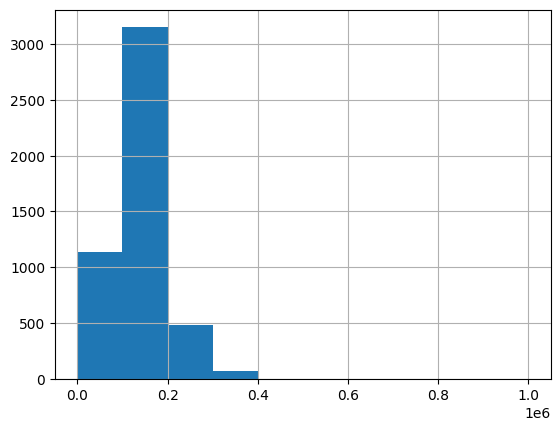

In [27]:
bmw3['mileage'].hist()

In [28]:
bmw3[bmw3['mileage']>0.4e6]

,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,prices,sold_at
557,520,484615,120,2011-02-01,diesel,blue,estate,True,True,False,False,False,False,True,False,8300,2018-03-01
1573,320,400654,110,2006-12-01,diesel,black,estate,False,False,True,False,False,False,True,False,1800,2018-07-01
2350,318,477571,85,2004-09-01,diesel,grey,hatchback,False,True,False,False,False,True,False,False,1200,2018-07-01
2829,525,439060,105,1996-10-01,diesel,silver,sedan,False,False,True,False,False,False,True,False,100,2018-03-01
3198,320,405816,100,2000-02-01,diesel,blue,sedan,False,False,False,False,False,False,True,False,500,2018-05-01
3732,118,1000376,90,2005-03-01,diesel,black,subcompact,True,False,False,False,False,False,True,False,1400,2018-06-01


In [29]:
len(bmw3[bmw3['mileage']>0.4e6])

6

In [30]:
media_mileage = bmw3[(bmw3['mileage']>0) & (bmw3['mileage']<=0.4e6)]['mileage'].mean()

In [31]:
media_mileage

140503.4760132341

In [32]:
mediana_mileage = bmw3[(bmw3['mileage']>0) & (bmw3['mileage']<=0.4e6)]['mileage'].median()

In [33]:
mediana_mileage

141027.0

In [34]:
bmw3['mileage'].fillna(mediana_mileage, inplace=True)

In [35]:
bmw3.isnull().sum()

model_key            0
mileage              0
engine_power         0
registration_date    0
fuel                 0
paint_color          0
car_type             0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
prices               0
sold_at              0
dtype: int64

Continúo con la columna 'engine_power', que tiene 1 nulo.

<Axes: >

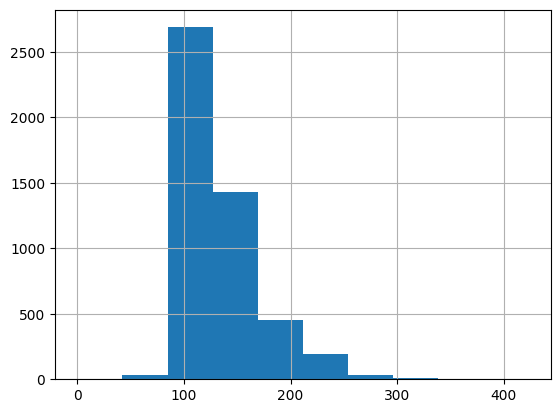

In [36]:
bmw3['engine_power'].hist()

In [37]:
bmw3[(bmw3['engine_power'] < 50) | (bmw3['engine_power'] > 340)]

,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,prices,sold_at
1796,i3,152328,25,2014-02-01,hybrid_petrol,black,hatchback,False,True,False,False,False,False,True,True,20300,2018-04-01
1925,i3,152470,25,2014-02-01,hybrid_petrol,black,hatchback,False,True,False,False,False,False,True,True,15500,2018-03-01
3601,M5,150187,412,2012-02-01,petrol,white,sedan,True,True,True,False,True,True,True,True,41600,2018-09-01
3765,X1,81770,0,2014-10-01,diesel,white,suv,False,False,False,False,False,False,False,False,11700,2018-03-01
4146,X6 M,2970,423,2016-04-01,petrol,red,suv,True,True,True,False,False,False,True,True,82400,2018-04-01


In [38]:
len(bmw3[(bmw3['engine_power'] < 50) | (bmw3['engine_power'] > 340)])

5

In [39]:
media_engine_power = bmw3[(bmw3['engine_power']>40) & (bmw3['engine_power']<340)]['engine_power'].mean()

In [40]:
media_engine_power

128.93861099627946

In [41]:
mediana_engine_power = bmw3[(bmw3['engine_power']>40) & (bmw3['engine_power']<340)]['engine_power'].median()

In [42]:
mediana_engine_power

120.0

In [43]:
bmw3['engine_power'].fillna(mediana_engine_power, inplace=True)

In [44]:
bmw3.isnull().sum()

model_key            0
mileage              0
engine_power         0
registration_date    0
fuel                 0
paint_color          0
car_type             0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
prices               0
sold_at              0
dtype: int64

Hago una nueva copia del dataset.

In [45]:
bmw4 = bmw3.copy()

In [46]:
bmw4['registration_date'].value_counts()

registration_date
2013-07-01    173
2014-03-01    162
2014-05-01    153
2013-01-01    148
2013-09-01    148
             ... 
2000-01-01      1
1990-03-01      1
1996-10-01      1
2017-03-01      1
2007-12-01      1
Name: count, Length: 199, dtype: int64

In [47]:
bmw4['model_key'].value_counts()

model_key
320                  752
520                  633
318                  569
X3                   438
116                  358
                    ... 
220 Active Tourer      1
635                    1
M135                   1
225 Active Tourer      1
214 Gran Tourer        1
Name: count, Length: 75, dtype: int64

In [52]:
bmw4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   model_key          4843 non-null   object        
 1   mileage            4843 non-null   int64         
 2   engine_power       4843 non-null   int64         
 3   registration_date  4843 non-null   datetime64[ns]
 4   fuel               4843 non-null   object        
 5   paint_color        4843 non-null   object        
 6   car_type           4843 non-null   object        
 7   feature_1          4843 non-null   bool          
 8   feature_2          4843 non-null   bool          
 9   feature_3          4843 non-null   bool          
 10  feature_4          4843 non-null   bool          
 11  feature_5          4843 non-null   bool          
 12  feature_6          4843 non-null   bool          
 13  feature_7          4843 non-null   bool          
 14  feature_

In [53]:
bmw5 = bmw4.copy()

In [49]:
bmw5 = bmw4.dropna(subset=['model_key' , 'registration_date'])

In [54]:
bmw5.isnull().sum()

model_key            0
mileage              0
engine_power         0
registration_date    0
fuel                 0
paint_color          0
car_type             0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
prices               0
sold_at              0
dtype: int64

In [55]:
bmw5['fuel'].value_counts()

fuel
diesel           4641
petrol            191
hybrid_petrol       8
electro             3
Name: count, dtype: int64

In [56]:
bmw5['fuel'].fillna('no_info', inplace=True)

In [57]:
for i in ['petrol', 'hybrid_petrol', 'electro', 'no_info']:
    bmw5['fuel'] = bmw5['fuel'].replace(i, 'no_diesel')

for i in ['Diesel', 'diesel']:
    bmw5['fuel'] = bmw5['fuel'].replace(i, 'diesel')

In [58]:
bmw5['fuel'].value_counts()

fuel
diesel       4641
no_diesel     202
Name: count, dtype: int64

In [59]:
bmw5.rename(columns={'fuel': 'gas_diesel'}, inplace=True)

In [60]:
bmw5['gas_diesel'] = bmw5['gas_diesel'].apply(lambda x: True if x == 'diesel' else False)

In [61]:
bmw5.head()

,model_key,mileage,engine_power,registration_date,gas_diesel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,prices,sold_at
0,118,140411,100,2012-02-01,True,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,M4,13929,317,2016-04-01,False,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,320,183297,120,2012-04-01,True,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,420,128035,135,2014-07-01,True,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,425,97097,160,2014-12-01,True,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01


In [62]:
bmw6 = bmw5.copy()

In [63]:
bmw6.isnull().sum()

model_key            0
mileage              0
engine_power         0
registration_date    0
gas_diesel           0
paint_color          0
car_type             0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
prices               0
sold_at              0
dtype: int64

In [64]:
bmw6['paint_color'].value_counts()

paint_color
black     1633
grey      1175
blue       710
white      538
brown      341
silver     329
red         52
beige       41
green       18
orange       6
Name: count, dtype: int64

In [65]:
bmw6[bmw6['paint_color'].isnull()]

,model_key,mileage,engine_power,registration_date,gas_diesel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,prices,sold_at


In [67]:
bmw6['paint_color'].fillna('unknown', inplace=True)

In [68]:
bmw6.isnull().sum()

model_key            0
mileage              0
engine_power         0
registration_date    0
gas_diesel           0
paint_color          0
car_type             0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
prices               0
sold_at              0
dtype: int64

In [69]:
bmw6['car_type'].value_counts()

car_type
estate         1606
sedan          1168
suv            1058
hatchback       699
subcompact      117
coupe           104
convertible      47
van              44
Name: count, dtype: int64

In [70]:
bmw6['car_type'].fillna('unknown', inplace=True)

Continuo con los 4 nulos de 'car_type'

In [71]:
bmw6['car_type'].value_counts()

car_type
estate         1606
sedan          1168
suv            1058
hatchback       699
subcompact      117
coupe           104
convertible      47
van              44
Name: count, dtype: int64

In [72]:
moda = bmw6['car_type'].mode()[0]
bmw6['car_type'].fillna(value=moda, inplace=True)

In [73]:
bmw6['feature_1'].value_counts()

feature_1
True     2662
False    2181
Name: count, dtype: int64

In [74]:
moda = bmw6['feature_1'].mode()[0]
bmw6['feature_1'].fillna(value=moda, inplace=True)

In [75]:
bmw6['feature_2'].value_counts()

feature_2
True     3839
False    1004
Name: count, dtype: int64

In [76]:
moda2 = bmw6['feature_2'].mode()[0]
bmw6['feature_2'].fillna(value=moda2, inplace=True)

In [77]:
bmw6['feature_3'].value_counts()

feature_3
False    3865
True      978
Name: count, dtype: int64

In [78]:
moda3 = bmw6['feature_3'].mode()[0]
bmw6['feature_3'].fillna(value=moda3, inplace=True)

In [79]:
bmw6['feature_4'].value_counts()

feature_4
False    3881
True      962
Name: count, dtype: int64

In [80]:
moda4 = bmw6['feature_4'].mode()[0]
bmw6['feature_4'].fillna(value=moda4, inplace=True)

In [81]:
bmw6.isnull().sum()

model_key            0
mileage              0
engine_power         0
registration_date    0
gas_diesel           0
paint_color          0
car_type             0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
prices               0
sold_at              0
dtype: int64

In [82]:
bmw_clean = bmw6.copy()

In [83]:
bmw_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   model_key          4843 non-null   object        
 1   mileage            4843 non-null   int64         
 2   engine_power       4843 non-null   int64         
 3   registration_date  4843 non-null   datetime64[ns]
 4   gas_diesel         4843 non-null   bool          
 5   paint_color        4843 non-null   object        
 6   car_type           4843 non-null   object        
 7   feature_1          4843 non-null   bool          
 8   feature_2          4843 non-null   bool          
 9   feature_3          4843 non-null   bool          
 10  feature_4          4843 non-null   bool          
 11  feature_5          4843 non-null   bool          
 12  feature_6          4843 non-null   bool          
 13  feature_7          4843 non-null   bool          
 14  feature_

In [84]:
len(bmw_clean[bmw_clean.duplicated()])

0

In [85]:
bmw_clean.tail()

,model_key,mileage,engine_power,registration_date,gas_diesel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,prices,sold_at
4838,218 Gran Tourer,39743,110,2015-10-01,True,black,van,False,True,False,False,False,False,True,False,14600,2018-08-01
4839,218 Active Tourer,49832,100,2015-06-01,True,grey,van,False,True,False,False,False,False,True,True,17500,2018-08-01
4840,218 Gran Tourer,19633,110,2015-10-01,True,grey,van,False,True,False,False,False,False,True,True,17000,2018-09-01
4841,218 Active Tourer,27920,110,2016-04-01,True,brown,van,True,True,False,False,False,False,True,True,22700,2018-09-01
4842,525,195840,160,2013-01-01,True,grey,van,True,True,False,False,True,False,True,True,15500,2018-09-01


In [86]:
bmw_clean.reset_index()

,index,model_key,mileage,engine_power,registration_date,gas_diesel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,prices,sold_at
0,0,118,140411,100,2012-02-01,True,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,1,M4,13929,317,2016-04-01,False,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,2,320,183297,120,2012-04-01,True,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,3,420,128035,135,2014-07-01,True,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,4,425,97097,160,2014-12-01,True,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,4838,218 Gran Tourer,39743,110,2015-10-01,True,black,van,False,True,False,False,False,False,True,False,14600,2018-08-01
4839,4839,218 Active Tourer,49832,100,2015-06-01,True,grey,van,False,True,False,False,False,False,True,True,17500,2018-08-01
4840,4840,218 Gran Tourer,19633,110,2015-10-01,True,grey,van,False,True,False,False,False,False,True,True,17000,2018-09-01
4841,4841,218 Active Tourer,27920,110,2016-04-01,True,brown,van,True,True,False,False,False,False,True,True,22700,2018-09-01


In [87]:
bmw_clean.reset_index(drop=True)

,model_key,mileage,engine_power,registration_date,gas_diesel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,prices,sold_at
0,118,140411,100,2012-02-01,True,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,M4,13929,317,2016-04-01,False,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,320,183297,120,2012-04-01,True,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,420,128035,135,2014-07-01,True,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,425,97097,160,2014-12-01,True,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743,110,2015-10-01,True,black,van,False,True,False,False,False,False,True,False,14600,2018-08-01
4839,218 Active Tourer,49832,100,2015-06-01,True,grey,van,False,True,False,False,False,False,True,True,17500,2018-08-01
4840,218 Gran Tourer,19633,110,2015-10-01,True,grey,van,False,True,False,False,False,False,True,True,17000,2018-09-01
4841,218 Active Tourer,27920,110,2016-04-01,True,brown,van,True,True,False,False,False,False,True,True,22700,2018-09-01


In [88]:
bmw_clean.reset_index(drop=True, inplace=True)

In [89]:
bmw_clean.tail()

,model_key,mileage,engine_power,registration_date,gas_diesel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,prices,sold_at
4838,218 Gran Tourer,39743,110,2015-10-01,True,black,van,False,True,False,False,False,False,True,False,14600,2018-08-01
4839,218 Active Tourer,49832,100,2015-06-01,True,grey,van,False,True,False,False,False,False,True,True,17500,2018-08-01
4840,218 Gran Tourer,19633,110,2015-10-01,True,grey,van,False,True,False,False,False,False,True,True,17000,2018-09-01
4841,218 Active Tourer,27920,110,2016-04-01,True,brown,van,True,True,False,False,False,False,True,True,22700,2018-09-01
4842,525,195840,160,2013-01-01,True,grey,van,True,True,False,False,True,False,True,True,15500,2018-09-01


In [90]:
for column in bmw_clean:
    if bmw_clean[column].dtype == 'object':
        print(f"Non-numeric column: {column}")

Non-numeric column: model_key
Non-numeric column: paint_color
Non-numeric column: car_type
Non-numeric column: sold_at


In [91]:

numeric_bmw_clean = bmw_clean.select_dtypes(include=['number'])
corr = numeric_bmw_clean.corr()


In [92]:
corr.style.background_gradient(cmap='coolwarm')

,mileage,engine_power,prices
mileage,1.000000,-0.050116,-0.409564
engine_power,-0.050116,1.000000,0.638989
prices,-0.409564,0.638989,1.000000


array([[<Axes: title={'center': 'prices'}>]], dtype=object)

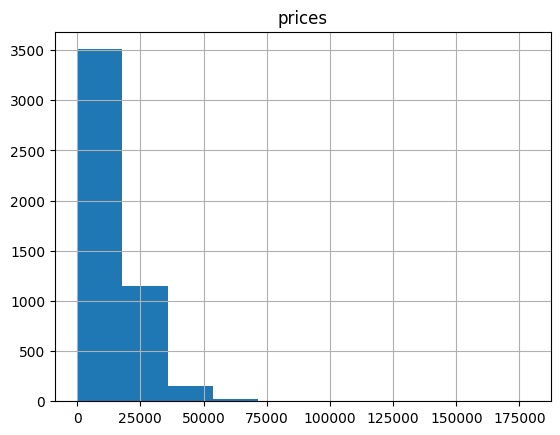

In [93]:
bmw_clean.hist(column='prices')

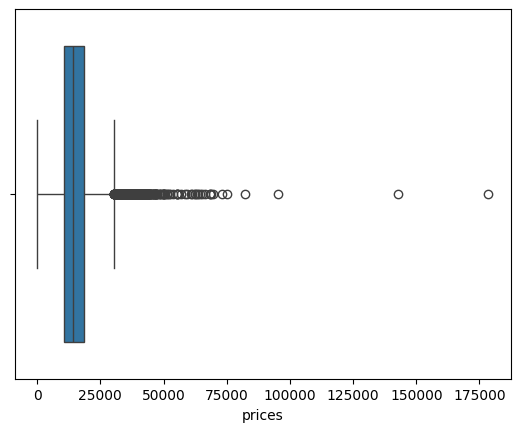

In [94]:
out_price = sns.boxplot(x=bmw_clean['prices'])

In [95]:
bmw_clean['car_prices']=np.log10(bmw_clean['prices'])

array([[<Axes: title={'center': 'car_prices'}>]], dtype=object)

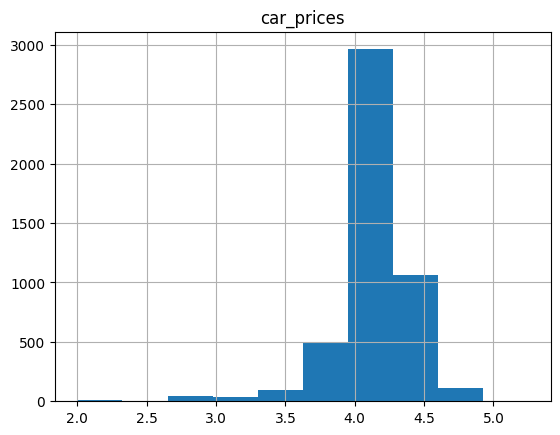

In [96]:
bmw_clean.hist(column='car_prices')

Miro de nuevo el impacto de los outliers tras hacer el logaritmo, para ver si se han atenuado respecto a los datos originales.

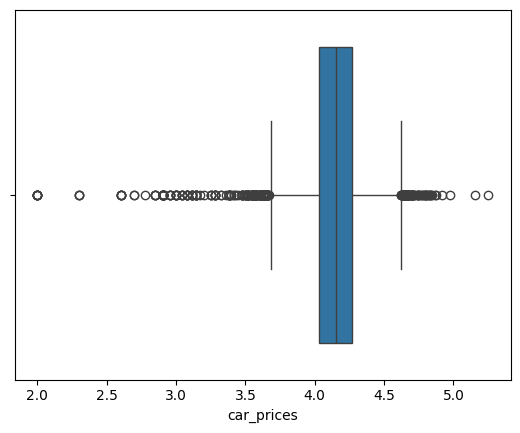

In [97]:
out_price2 = sns.boxplot(x=bmw_clean['car_prices'])

In [98]:
bmw_clean.head()

,model_key,mileage,engine_power,registration_date,gas_diesel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,prices,sold_at,car_prices
0,118,140411,100,2012-02-01,True,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01,4.053078
1,M4,13929,317,2016-04-01,False,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01,4.843233
2,320,183297,120,2012-04-01,True,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01,4.008600
3,420,128035,135,2014-07-01,True,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01,4.399674
4,425,97097,160,2014-12-01,True,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01,4.523746


<ipython-input-99-a97d94519d7c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='gas_diesel',y='prices', data=bmw_clean, palette='Blues')


<Axes: xlabel='gas_diesel', ylabel='prices'>

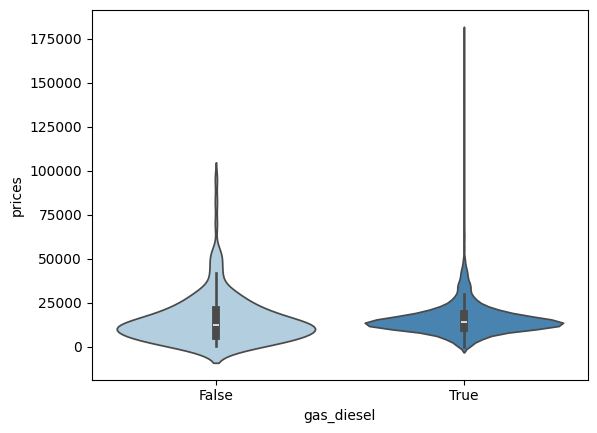

In [99]:
sns.violinplot(x='gas_diesel',y='prices', data=bmw_clean, palette='Blues')

<ipython-input-100-ea5bdd8cc6a2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='feature_1',y='prices', data=bmw_clean, palette='Blues')


<Axes: xlabel='feature_1', ylabel='prices'>

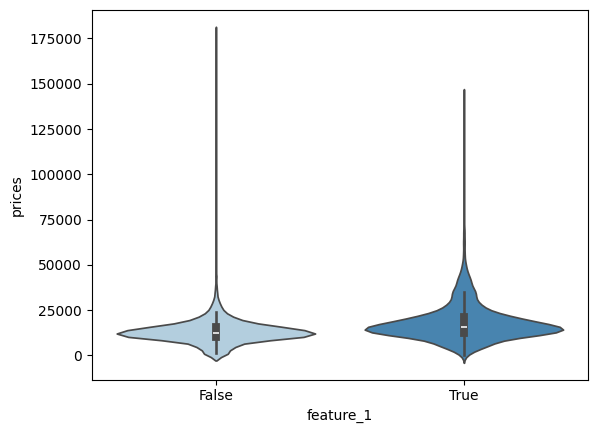

In [100]:
sns.violinplot(x='feature_1',y='prices', data=bmw_clean, palette='Blues')

<Axes: xlabel='engine_power', ylabel='prices'>

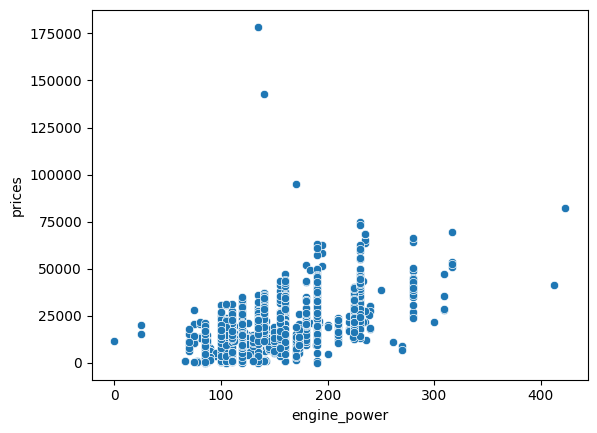

In [101]:
sns.scatterplot(x='engine_power', y='prices', data=bmw_clean)

<Axes: xlabel='engine_power', ylabel='prices'>

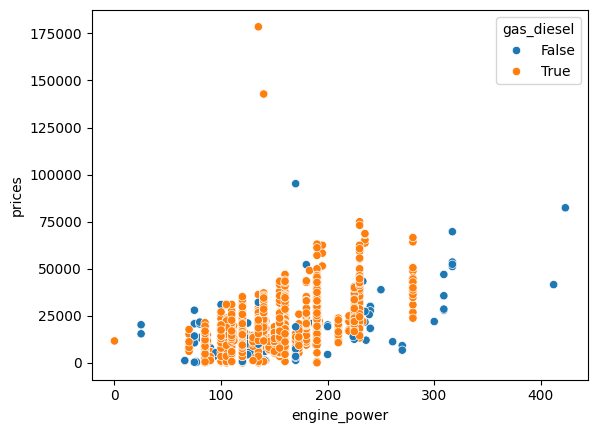

In [102]:
sns.scatterplot(x='engine_power', hue='gas_diesel', y='prices', data=bmw_clean)

In [103]:
for i in bmw_clean:
  print (i)

model_key
mileage
engine_power
registration_date
gas_diesel
paint_color
car_type
feature_1
feature_2
feature_3
feature_4
feature_5
feature_6
feature_7
feature_8
prices
sold_at
car_prices


In [104]:
for i in bmw_clean:
  print (bmw_clean[i].value_counts())

model_key
320                  752
520                  633
318                  569
X3                   438
116                  358
                    ... 
220 Active Tourer      1
635                    1
M135                   1
225 Active Tourer      1
214 Gran Tourer        1
Name: count, Length: 75, dtype: int64
mileage
123492    2
108352    2
180606    2
72760     2
78156     2
         ..
133178    1
105959    1
193231    1
84058     1
195840    1
Name: count, Length: 4786, dtype: int64
engine_power
135    882
120    785
85     631
100    570
105    451
      ... 
224      1
121      1
239      1
236      1
261      1
Name: count, Length: 61, dtype: int64
registration_date
2013-07-01    173
2014-03-01    162
2014-05-01    153
2013-01-01    148
2013-09-01    148
             ... 
2000-01-01      1
1990-03-01      1
1996-10-01      1
2017-03-01      1
2007-12-01      1
Name: count, Length: 199, dtype: int64
gas_diesel
True     4641
False     202
Name: count, dtype: int64
paint

In [105]:
target = ['prices']

In [106]:
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if dataset[i].dtype == bool and i not in target:
            lista_boolean.append(i)
        elif dataset[i].dtype.kind in ["i","f"] and i not in target:
            lista_numericas.append(i)
        else:
            lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

In [107]:
l_num, l_bool, l_cat = obtener_lista_variables(bmw_clean)

In [108]:
print(f'Numericas: {l_num}')
print(f'Boolean: {l_bool}')
print(f'Categóricas: {l_cat}')

Numericas: ['mileage', 'engine_power', 'car_prices']
Boolean: ['gas_diesel', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8']
Categóricas: ['model_key', 'registration_date', 'paint_color', 'car_type', 'prices', 'sold_at']


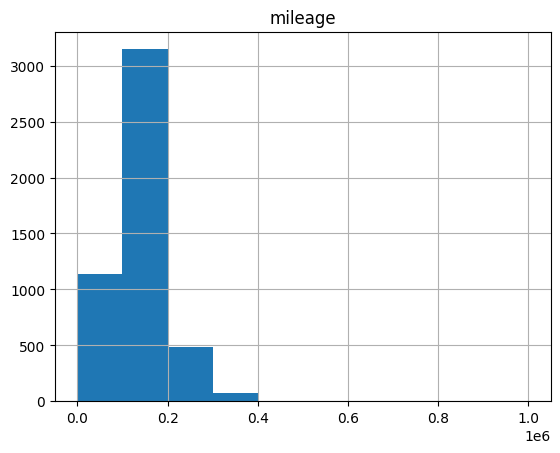

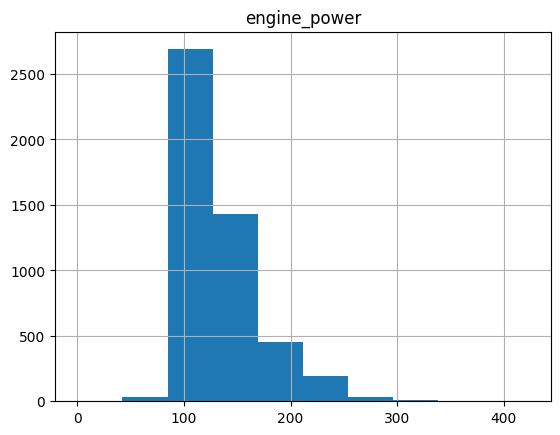

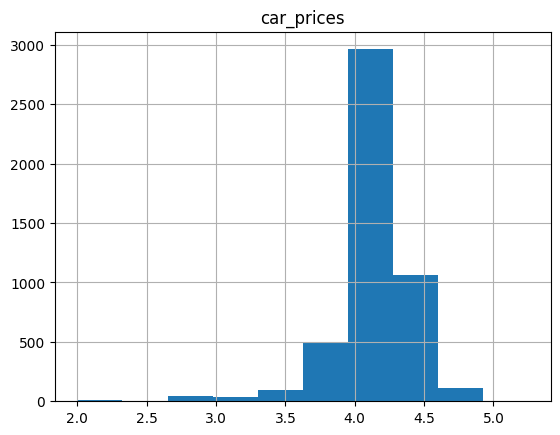

In [109]:
for i in l_num:
 bmw_clean.hist(i)

In [110]:
for i in l_cat:
 print(bmw_clean[i].value_counts())

model_key
320                  752
520                  633
318                  569
X3                   438
116                  358
                    ... 
220 Active Tourer      1
635                    1
M135                   1
225 Active Tourer      1
214 Gran Tourer        1
Name: count, Length: 75, dtype: int64
registration_date
2013-07-01    173
2014-03-01    162
2014-05-01    153
2013-01-01    148
2013-09-01    148
             ... 
2000-01-01      1
1990-03-01      1
1996-10-01      1
2017-03-01      1
2007-12-01      1
Name: count, Length: 199, dtype: int64
paint_color
black     1633
grey      1175
blue       710
white      538
brown      341
silver     329
red         52
beige       41
green       18
orange       6
Name: count, dtype: int64
car_type
estate         1606
sedan          1168
suv            1058
hatchback       699
subcompact      117
coupe           104
convertible      47
van              44
Name: count, dtype: int64
prices
13100    69
14900    65
11900   

In [112]:
bmw_clean.head()

,model_key,mileage,engine_power,registration_date,gas_diesel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,prices,sold_at,car_prices
0,118,140411,100,2012-02-01,True,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01,4.053078
1,M4,13929,317,2016-04-01,False,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01,4.843233
2,320,183297,120,2012-04-01,True,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01,4.008600
3,420,128035,135,2014-07-01,True,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01,4.399674
4,425,97097,160,2014-12-01,True,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01,4.523746


In [113]:
bmw_clean[bmw_clean['car_prices']<0]

,model_key,mileage,engine_power,registration_date,gas_diesel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,prices,sold_at,car_prices


In [114]:
bmw_clean.drop(bmw_clean[bmw_clean['car_prices'] < 0].index, inplace=True)

In [115]:
bmw_clean1 = bmw_clean.copy()

In [116]:
bmw_clean1.reset_index(drop=True, inplace=True)

In [117]:
bmw_clean1.tail()

,model_key,mileage,engine_power,registration_date,gas_diesel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,prices,sold_at,car_prices
4838,218 Gran Tourer,39743,110,2015-10-01,True,black,van,False,True,False,False,False,False,True,False,14600,2018-08-01,4.164353
4839,218 Active Tourer,49832,100,2015-06-01,True,grey,van,False,True,False,False,False,False,True,True,17500,2018-08-01,4.243038
4840,218 Gran Tourer,19633,110,2015-10-01,True,grey,van,False,True,False,False,False,False,True,True,17000,2018-09-01,4.230449
4841,218 Active Tourer,27920,110,2016-04-01,True,brown,van,True,True,False,False,False,False,True,True,22700,2018-09-01,4.356026
4842,525,195840,160,2013-01-01,True,grey,van,True,True,False,False,True,False,True,True,15500,2018-09-01,4.190332


In [118]:
bmw_clean1 = bmw_clean1.drop(['model_key', 'registration_date'], axis=1)

In [119]:
bmw_clean1.head()

,mileage,engine_power,gas_diesel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,prices,sold_at,car_prices
0,140411,100,True,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01,4.053078
1,13929,317,False,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01,4.843233
2,183297,120,True,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01,4.008600
3,128035,135,True,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01,4.399674
4,97097,160,True,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01,4.523746


In [120]:
paint_colores = ['brown', 'silver', 'red', 'beige', 'green', 'unknown', 'orange']
bmw_clean1['paint_color'] = np.where(bmw_clean1['paint_color'].isin(paint_colores), 'otro_paint_color', bmw_clean1['paint_color'])

In [121]:
bmw_clean1.head()

,mileage,engine_power,gas_diesel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,prices,sold_at,car_prices
0,140411,100,True,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01,4.053078
1,13929,317,False,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01,4.843233
2,183297,120,True,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01,4.008600
3,128035,135,True,otro_paint_color,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01,4.399674
4,97097,160,True,otro_paint_color,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01,4.523746


In [122]:
tipos = ['subcompact', 'coupe', 'convertible', 'van', 'unknown']
bmw_clean1['car_type'] = np.where(bmw_clean1['car_type'].isin(tipos), 'otro_tipo', bmw_clean1['car_type'])

In [123]:
bmw_clean1.head()

,mileage,engine_power,gas_diesel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,prices,sold_at,car_prices
0,140411,100,True,black,otro_tipo,True,True,False,False,True,True,True,False,11300,2018-01-01,4.053078
1,13929,317,False,grey,otro_tipo,True,True,False,False,False,True,True,True,69700,2018-02-01,4.843233
2,183297,120,True,white,otro_tipo,False,False,False,False,True,False,True,False,10200,2018-02-01,4.008600
3,128035,135,True,otro_paint_color,otro_tipo,True,True,False,False,True,True,True,True,25100,2018-02-01,4.399674
4,97097,160,True,otro_paint_color,otro_tipo,True,True,False,False,False,True,True,True,33400,2018-04-01,4.523746


In [124]:
bmw_clean1['car_type'].value_counts()

car_type
estate       1606
sedan        1168
suv          1058
hatchback     699
otro_tipo     312
Name: count, dtype: int64

In [125]:
car_typeo_count = bmw_clean1['car_type'].value_counts()

In [126]:
otros_car_typeos = list(car_typeo_count[car_typeo_count < 358].index)

In [127]:
bmw_clean1['car_type'] = np.where(bmw_clean1['car_type'].isin(otros_car_typeos), 'car_type', bmw_clean1['car_type'])

In [128]:
bmw_clean1.head()

,mileage,engine_power,gas_diesel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,prices,sold_at,car_prices
0,140411,100,True,black,car_type,True,True,False,False,True,True,True,False,11300,2018-01-01,4.053078
1,13929,317,False,grey,car_type,True,True,False,False,False,True,True,True,69700,2018-02-01,4.843233
2,183297,120,True,white,car_type,False,False,False,False,True,False,True,False,10200,2018-02-01,4.008600
3,128035,135,True,otro_paint_color,car_type,True,True,False,False,True,True,True,True,25100,2018-02-01,4.399674
4,97097,160,True,otro_paint_color,car_type,True,True,False,False,False,True,True,True,33400,2018-04-01,4.523746


In [129]:
for i in l_bool:
 print(bmw_clean1[i].value_counts())

gas_diesel
True     4641
False     202
Name: count, dtype: int64
feature_1
True     2662
False    2181
Name: count, dtype: int64
feature_2
True     3839
False    1004
Name: count, dtype: int64
feature_3
False    3865
True      978
Name: count, dtype: int64
feature_4
False    3881
True      962
Name: count, dtype: int64
feature_5
False    2613
True     2230
Name: count, dtype: int64
feature_6
False    3674
True     1169
Name: count, dtype: int64
feature_7
True     4514
False     329
Name: count, dtype: int64
feature_8
True     2620
False    2223
Name: count, dtype: int64


In [147]:
booleans = ['mileage', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'paint_color']
bmw_clean1[booleans] = bmw_clean1[booleans].astype(int)


In [131]:
booleans = ['mileage', 'feature_1', 'feature_2', 'feature_3', 'feature_4']
bmw_clean1[booleans] = bmw_clean1[booleans].astype(int)

In [132]:
bmw_clean1['paint_color'] = bmw_clean1['paint_color'].astype('category')
booleans = ['mileage', 'feature_1', 'feature_2', 'feature_3', 'feature_4']
bmw_clean1[booleans] = bmw_clean1[booleans].astype(int)

In [146]:
bmw_clean1['paint_color'] = pd.to_numeric(bmw_clean1['paint_color'], errors='coerce')
booleans = ['mileage', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'paint_color']
bmw_clean1[booleans] = bmw_clean1[booleans].astype(int)

In [134]:
import pandas as pd

# Convert 'paint_color' column to numeric
bmw_clean1['paint_color'] = pd.to_numeric(bmw_clean1['paint_color'], errors='coerce')

# Handle non-finite values by replacing them with a default value (e.g., 0)
bmw_clean1['paint_color'].fillna(0, inplace=True)

# Convert selected columns to integer type
booleans = ['mileage', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'paint_color']
bmw_clean1[booleans] = bmw_clean1[booleans].astype(int)


In [135]:
bmw_clean1.head()

,mileage,engine_power,gas_diesel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,prices,sold_at,car_prices
0,140411,100,True,0,car_type,1,1,0,0,True,True,True,False,11300,2018-01-01,4.053078
1,13929,317,False,0,car_type,1,1,0,0,False,True,True,True,69700,2018-02-01,4.843233
2,183297,120,True,0,car_type,0,0,0,0,True,False,True,False,10200,2018-02-01,4.008600
3,128035,135,True,0,car_type,1,1,0,0,True,True,True,True,25100,2018-02-01,4.399674
4,97097,160,True,0,car_type,1,1,0,0,False,True,True,True,33400,2018-04-01,4.523746


In [136]:
bmw_clean2 = bmw_clean1.copy()

In [137]:
col_one_hot = ['paint_color', 'car_type', 'car_type']
bmw_clean2 = pd.get_dummies(bmw_clean1, columns=col_one_hot)

In [138]:
bmw_clean2.head()

,mileage,engine_power,gas_diesel,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,car_type_car_type,car_type_estate,car_type_hatchback,car_type_sedan,car_type_suv,car_type_car_type,car_type_estate,car_type_hatchback,car_type_sedan,car_type_suv
0,140411,100,True,1,1,0,0,True,True,True,...,True,False,False,False,False,True,False,False,False,False
1,13929,317,False,1,1,0,0,False,True,True,...,True,False,False,False,False,True,False,False,False,False
2,183297,120,True,0,0,0,0,True,False,True,...,True,False,False,False,False,True,False,False,False,False
3,128035,135,True,1,1,0,0,True,True,True,...,True,False,False,False,False,True,False,False,False,False
4,97097,160,True,1,1,0,0,False,True,True,...,True,False,False,False,False,True,False,False,False,False


In [139]:
bmw_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mileage             4843 non-null   int64  
 1   engine_power        4843 non-null   int64  
 2   gas_diesel          4843 non-null   bool   
 3   feature_1           4843 non-null   int64  
 4   feature_2           4843 non-null   int64  
 5   feature_3           4843 non-null   int64  
 6   feature_4           4843 non-null   int64  
 7   feature_5           4843 non-null   bool   
 8   feature_6           4843 non-null   bool   
 9   feature_7           4843 non-null   bool   
 10  feature_8           4843 non-null   bool   
 11  prices              4843 non-null   int64  
 12  sold_at             4843 non-null   object 
 13  car_prices          4843 non-null   float64
 14  paint_color_0       4843 non-null   bool   
 15  car_type_car_type   4843 non-null   bool   
 16  car_ty

In [152]:
MMscaler = MinMaxScaler()
bmw_clean2[['mileage', 'engine_power']] = MMscaler.fit_transform(bmw_clean2[['mileage', 'engine_power']])

In [143]:
bmw_clean2.to_pickle('/content/drive/MyDrive/bmw_pricing_challenge.csv')

In [144]:
df_bmw_recuperar = pd.read_pickle('/content/drive/MyDrive/bmw_pricing_challenge.csv')

In [151]:
df_bmw_recuperar.head()

,mileage,engine_power,gas_diesel,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,car_type_car_type,car_type_estate,car_type_hatchback,car_type_sedan,car_type_suv,car_type_car_type,car_type_estate,car_type_hatchback,car_type_sedan,car_type_suv
0,0.140413,0.236407,True,1,1,0,0,True,True,True,...,True,False,False,False,False,True,False,False,False,False
1,0.013987,0.749409,False,1,1,0,0,False,True,True,...,True,False,False,False,False,True,False,False,False,False
2,0.183280,0.283688,True,0,0,0,0,True,False,True,...,True,False,False,False,False,True,False,False,False,False
3,0.128043,0.319149,True,1,1,0,0,True,True,True,...,True,False,False,False,False,True,False,False,False,False
4,0.097118,0.378251,True,1,1,0,0,False,True,True,...,True,False,False,False,False,True,False,False,False,False
